## WORKGROUP 5 

Integrantes: 
- Valeria Hoyos Macedo
- Josué Eduardo Maguiña Mezaz
- Alvaro Alexander Yllu Socualaya
- Maria pamela Cubas Albujar

# Replication and Data analysis - Python

In [ ]:
# Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LinearRegression, Ridge, Lasso, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf
from econml.sklearn_extensions.linear_model import WeightedLasso
import patsy
warnings.simplefilter('ignore')

# Set random seed for reproducibility
np.random.seed(123)

## 1. Descriptives

Show tables to describe your main variables. Try to split your analysis between the treated and control groups. You can use a balance table.

In [ ]:
# Upload data
data = pd.read_csv('/Users/victorcubas/Downloads/processed_esti.csv')

In [ ]:
# Print data
print(data.head())

   y  w  gender_female  gender_male  gender_transgender  ethnicgrp_asian  \
0  1  1              0            1                   0                0   
1  0  0              0            1                   0                0   
2  0  1              0            1                   0                0   
3  0  0              1            0                   0                0   
4  1  1              1            0                   0                1   

   ethnicgrp_black  ethnicgrp_mixed_multiple  ethnicgrp_other  \
0                0                         1                0   
1                0                         0                0   
2                1                         0                0   
3                0                         0                0   
4                0                         0                0   

   ethnicgrp_white  partners1  postlaunch  msm  age  imd_decile  
0                0          0           1    0   27           5  
1                1  

In [ ]:
df = pd.DataFrame(data)

In [ ]:
# Create the control data
# Select the columns
Control_antes = ['age', 'gender_female', 'ethnicgrp_black']

# Filter the Data
Control = df[df['w'] == 0][Control_antes]

print(Control)

      age  gender_female  ethnicgrp_black
1      19              0                0
3      20              1                0
7      21              0                1
10     28              0                0
11     24              1                0
...   ...            ...              ...
1729   27              1                0
1730   19              1                0
1731   20              1                0
1733   26              0                1
1734   24              0                0

[818 rows x 3 columns]


In [ ]:
# Create the treatment data
# Select the columns
Tratamiento_antes = ['age', 'gender_female', 'ethnicgrp_black']

# Filter the Data
Tratamiento = df[df['w'] == 1][Tratamiento_antes]

print(Tratamiento)

      age  gender_female  ethnicgrp_black
0      27              0                0
2      26              0                1
4      24              1                0
5      24              0                0
6      24              1                0
...   ...            ...              ...
1732   26              1                0
1735   29              1                1
1736   27              1                0
1737   25              1                0
1738   25              1                0

[921 rows x 3 columns]


In [ ]:
# DataFrames
df_control = pd.DataFrame(Control)
df_tratamiento = pd.DataFrame(Tratamiento)

# Calculate the number of observations, mean and sd
num_obs_control = df_control.count()
num_obs_tratamiento = df_tratamiento.count()
mean_control = df_control.mean()
mean_tratamiento = df_tratamiento.mean()
dsv_control = df_tratamiento.std()
dsv_tratamiento = df_tratamiento.std()
diferencia = mean_tratamiento - mean_control

# Create a DataFrame with the results
tabla_diferencias = pd.DataFrame({
    'n (Control)': num_obs_control,
    'mean(Control)': mean_control,
    'sd (Control)': dsv_control,
    'n (Tratamiento)': num_obs_tratamiento,
    'mean (Tratamiento)': mean_tratamiento,
    'sd (Tratamiento)': dsv_tratamiento,
    'Diff': diferencia
})

# Show the table
print(tabla_diferencias.to_string(index=True, float_format='%.2f'))

                 n (Control)  mean(Control)  sd (Control)  n (Tratamiento)  mean (Tratamiento)  sd (Tratamiento)  Diff
age                      818          23.05          3.54              921               23.16              3.54  0.11
gender_female            818           0.58          0.49              921                0.59              0.49  0.01
ethnicgrp_black          818           0.09          0.27              921                0.08              0.27 -0.01


Show graphs that help to describe your variables. Try to split your analysis between the treated and control groups.

In [ ]:
columns = ['age', 'gender_female', 'gender_male', 'ethnicgrp_black', 'gender_transgender', 'ethnicgrp_asian', 'ethnicgrp_mixed_multiple', 'ethnicgrp_other', 'ethnicgrp_white', 'partners1', 'postlaunch', 'msm']

/Users/victorcubas/Downloads/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


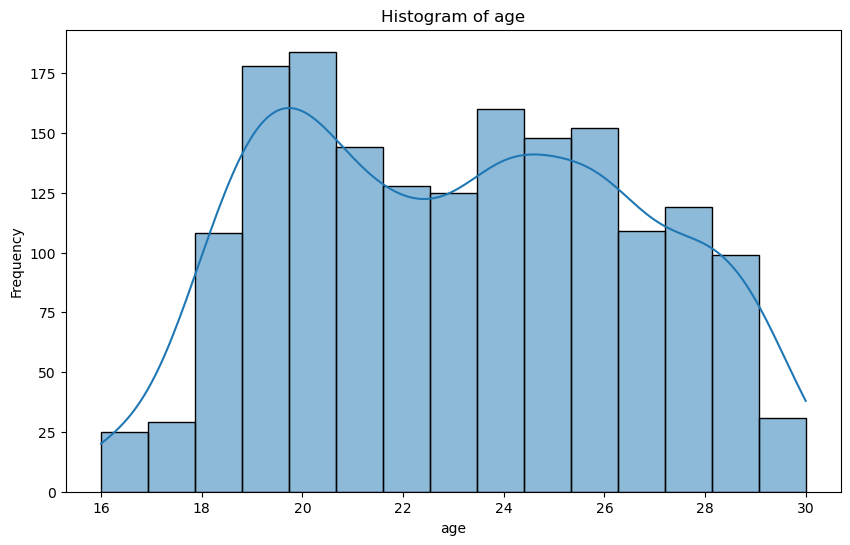

In [ ]:
# Plot histogram
for col in ['age']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

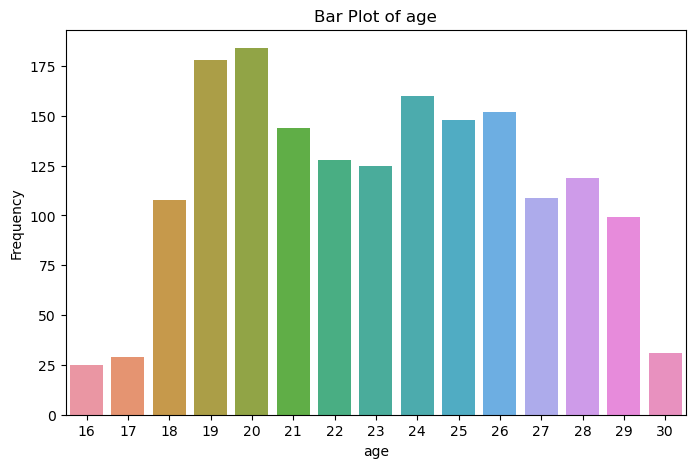

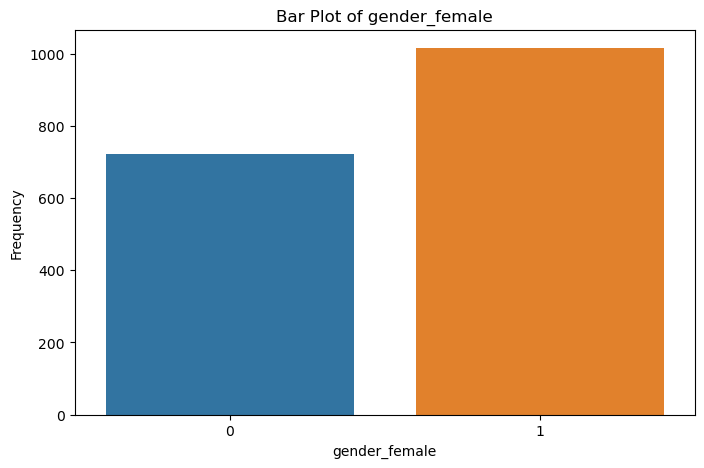

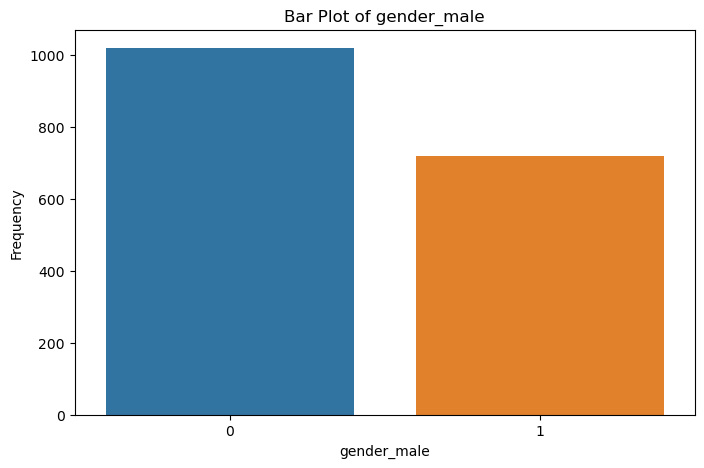

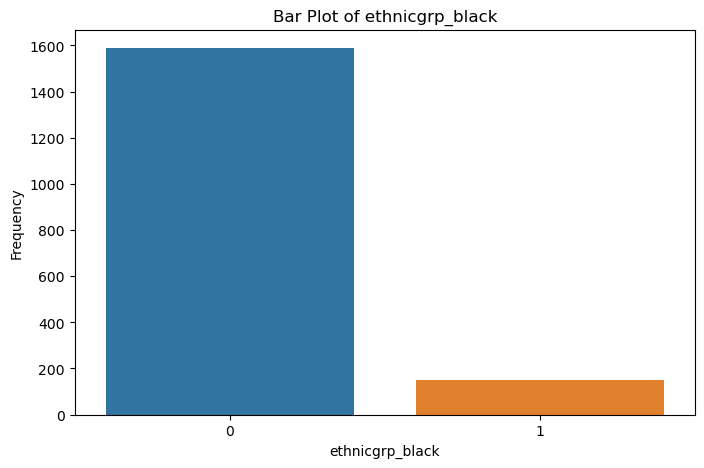

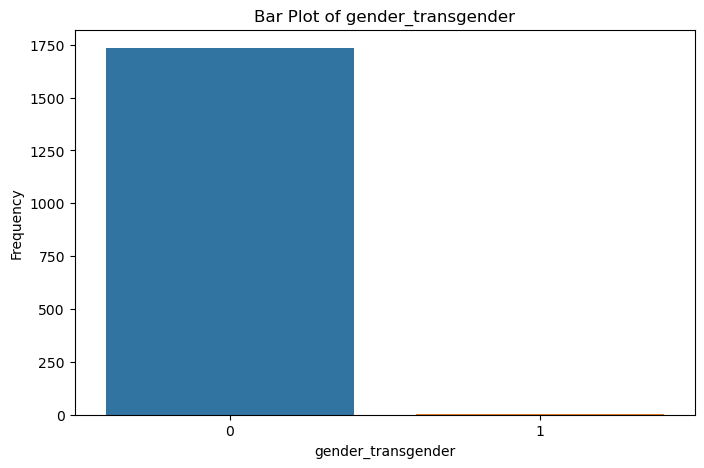

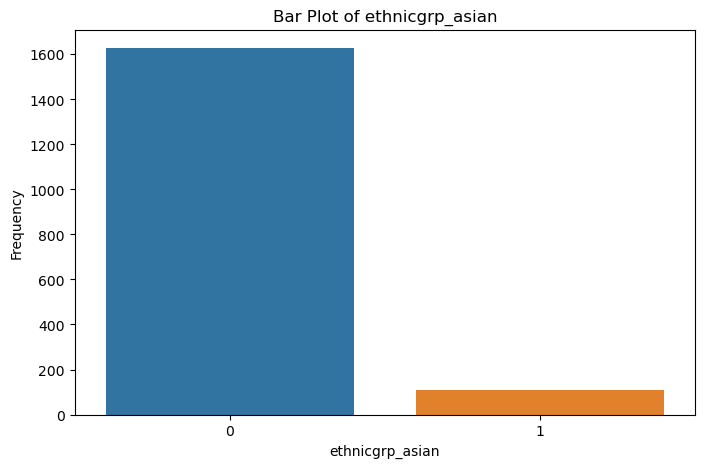

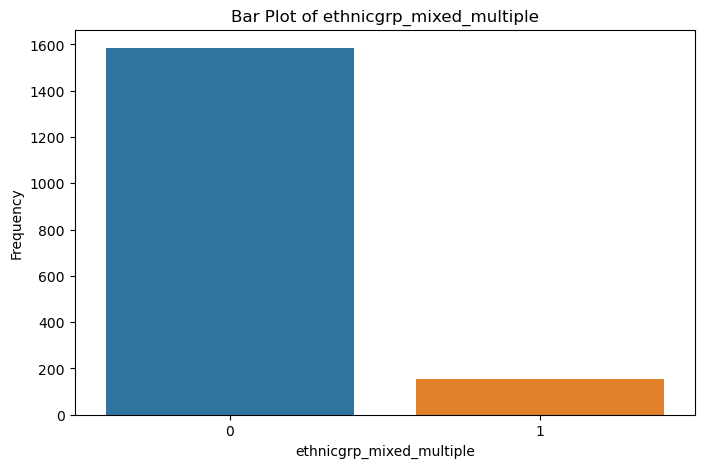

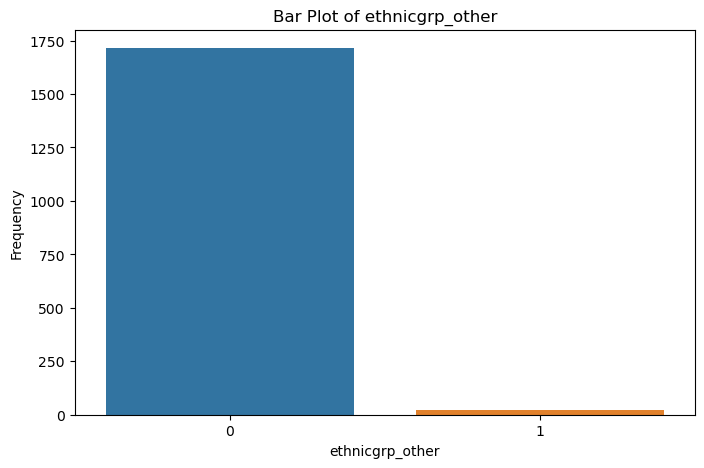

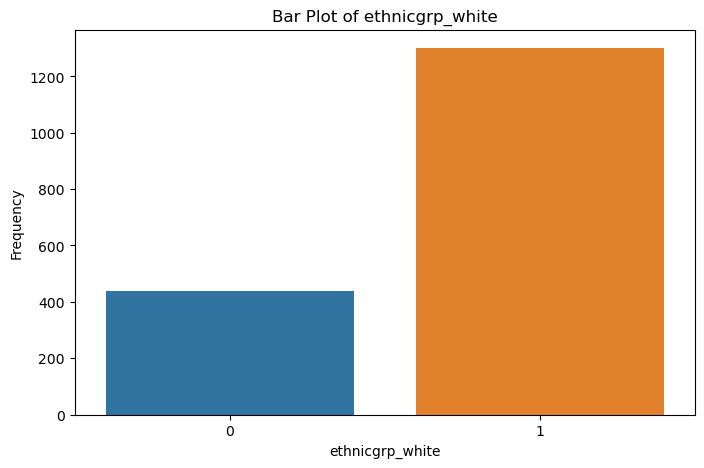

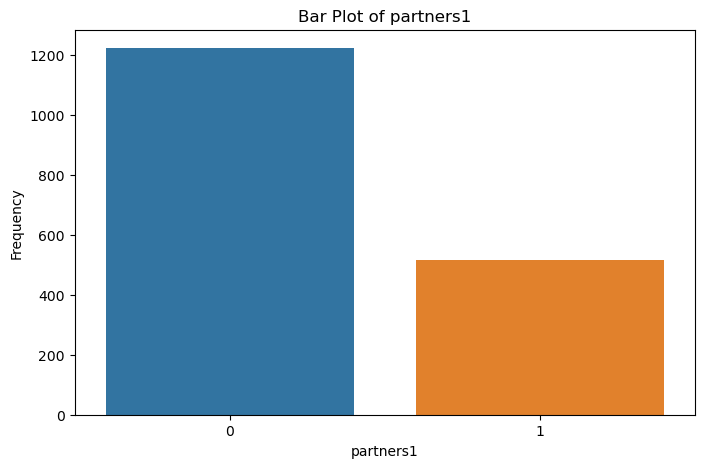

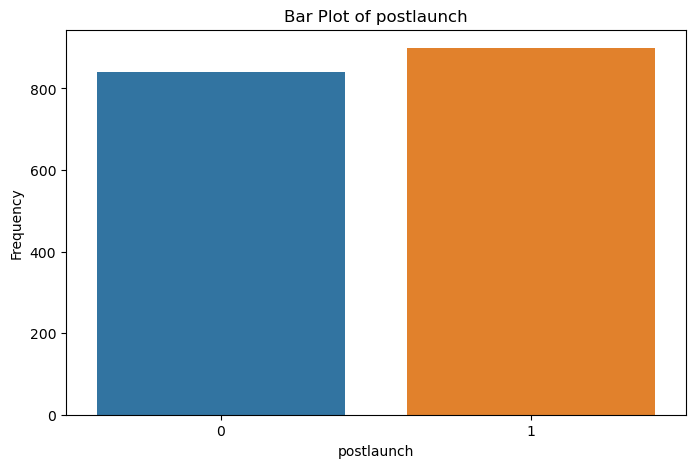

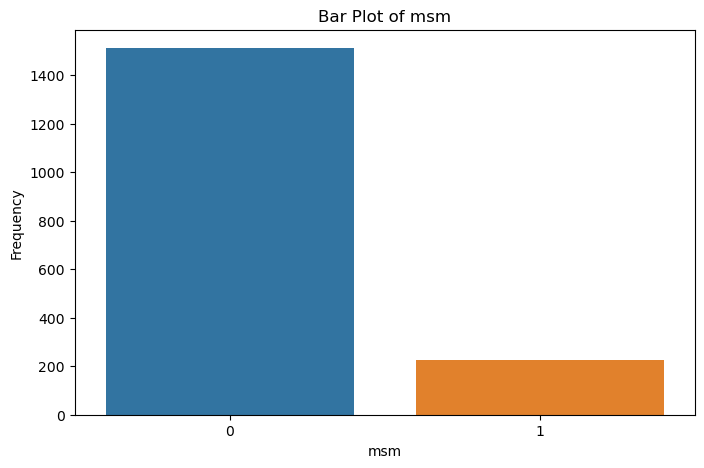

In [ ]:
# Plot boxplots for each variable split by treatment
for col in columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

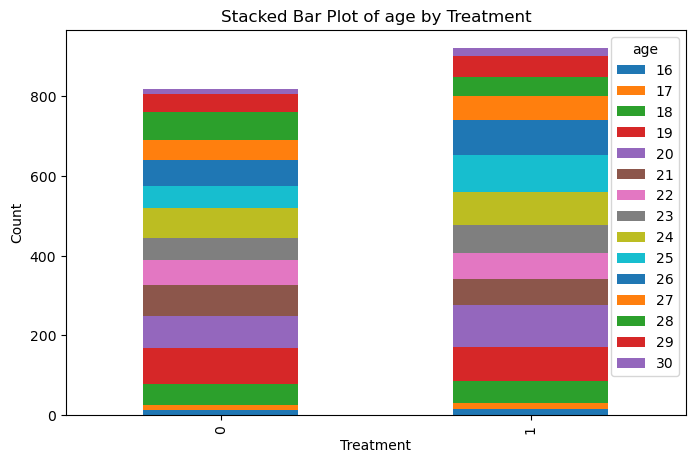

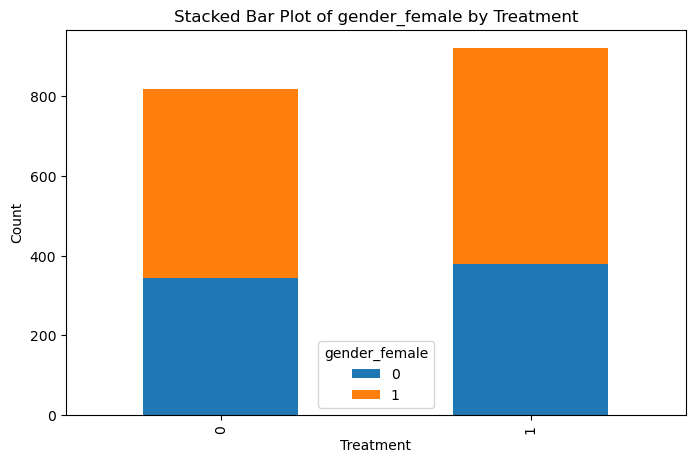

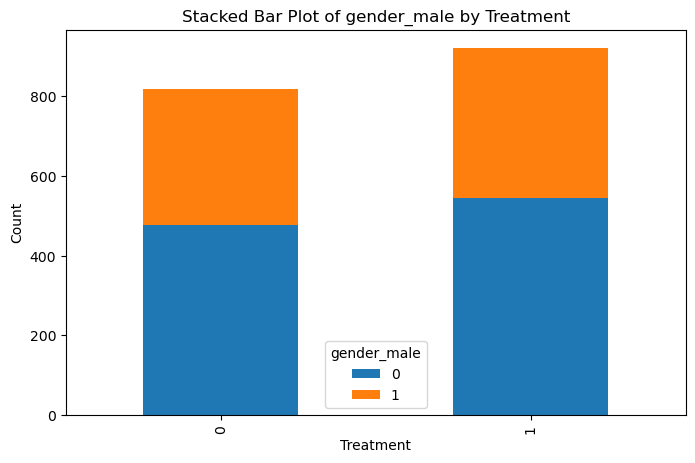

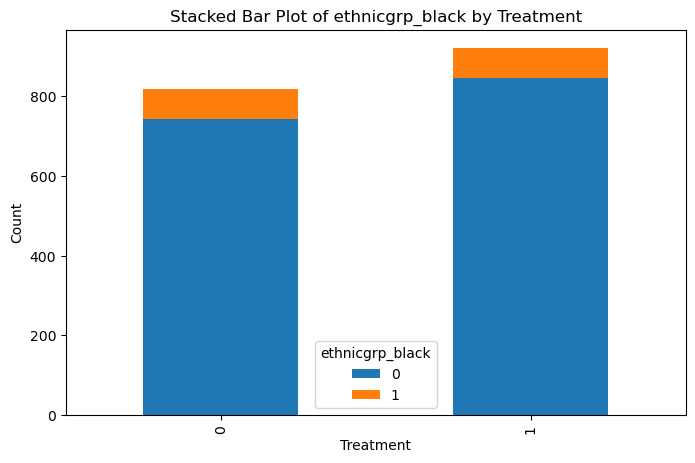

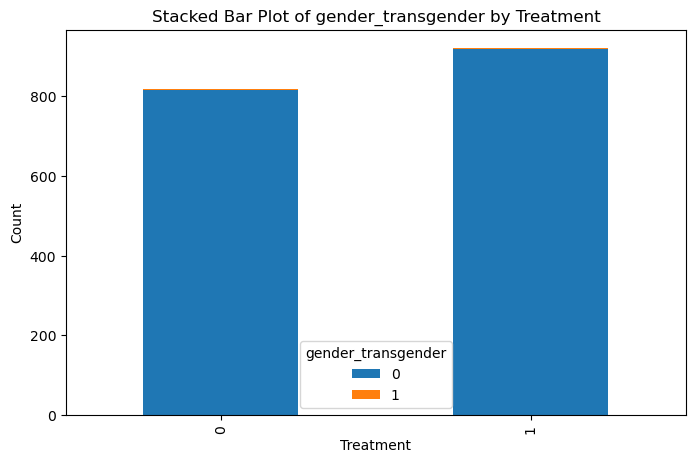

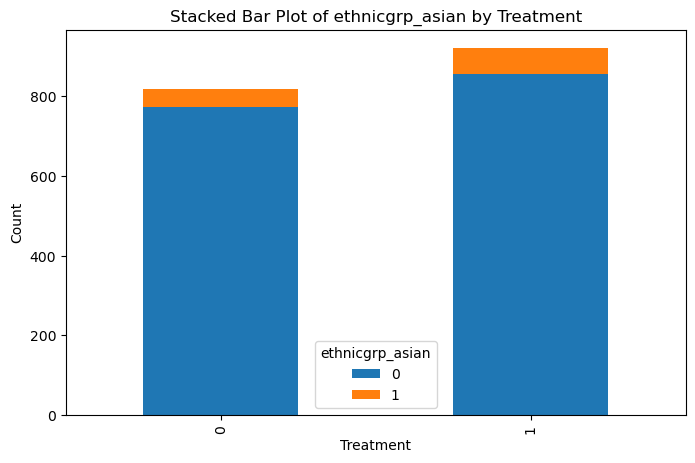

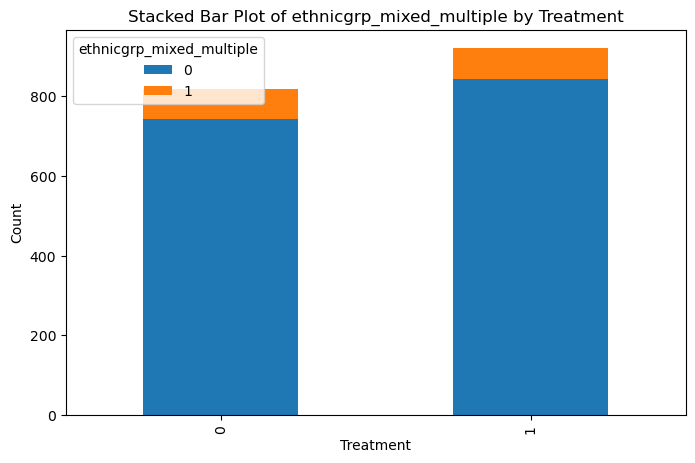

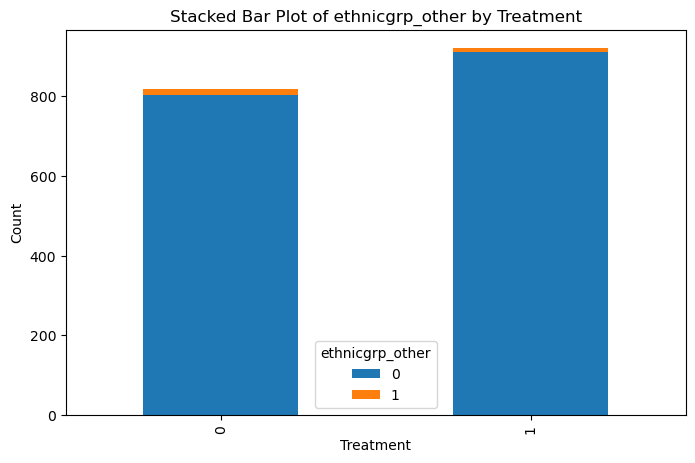

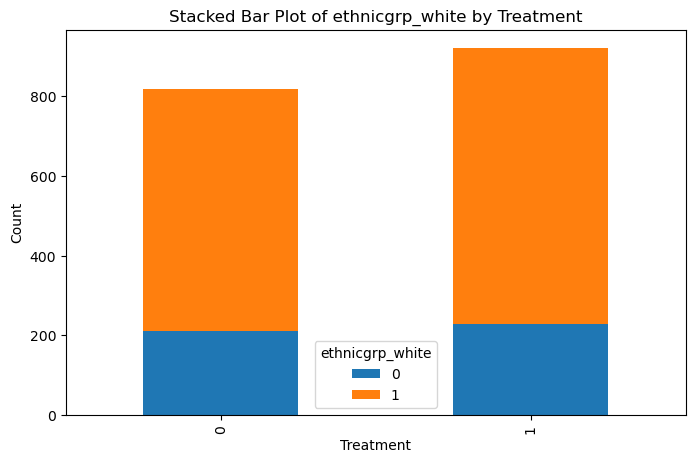

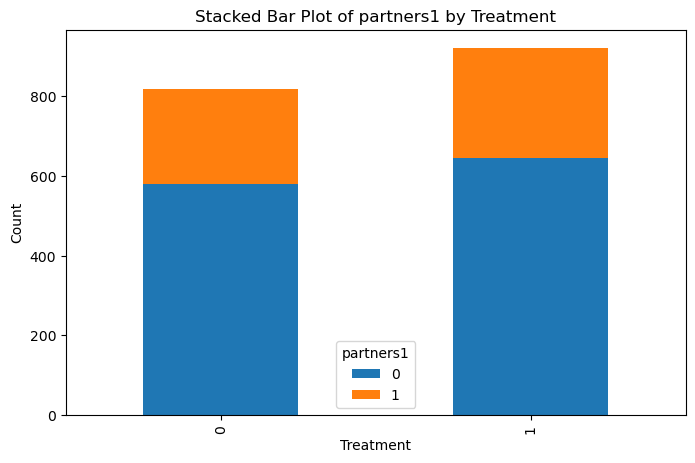

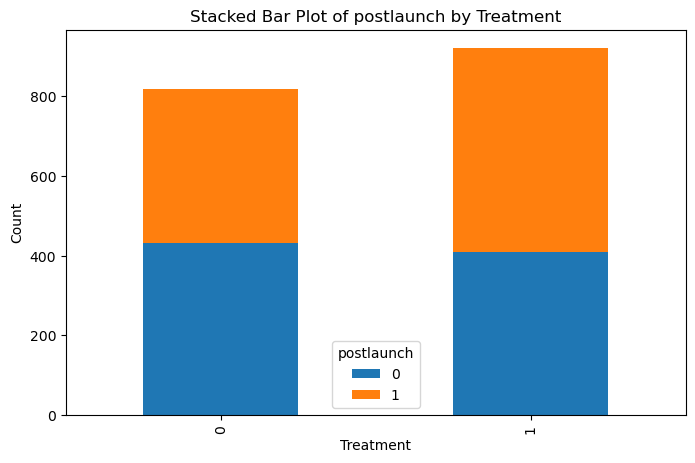

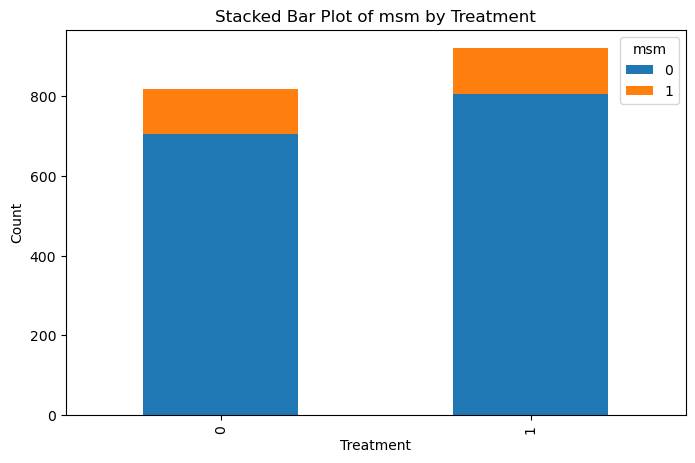

In [ ]:
# Function to create a stacked bar plot
def stacked_bar_plot(df, col):
    counts = df.groupby(['w', col]).size().unstack().fillna(0)
    counts.plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.title(f'Stacked Bar Plot of {col} by Treatment')
    plt.xlabel('Treatment')
    plt.ylabel('Count')
    plt.show()

# Plot stacked bar plots for each dummy variable
for col in columns:
    stacked_bar_plot(df, col)


/Users/victorcubas/Downloads/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/victorcubas/Downloads/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/victorcubas/Downloads/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/victorcubas/Downloads/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

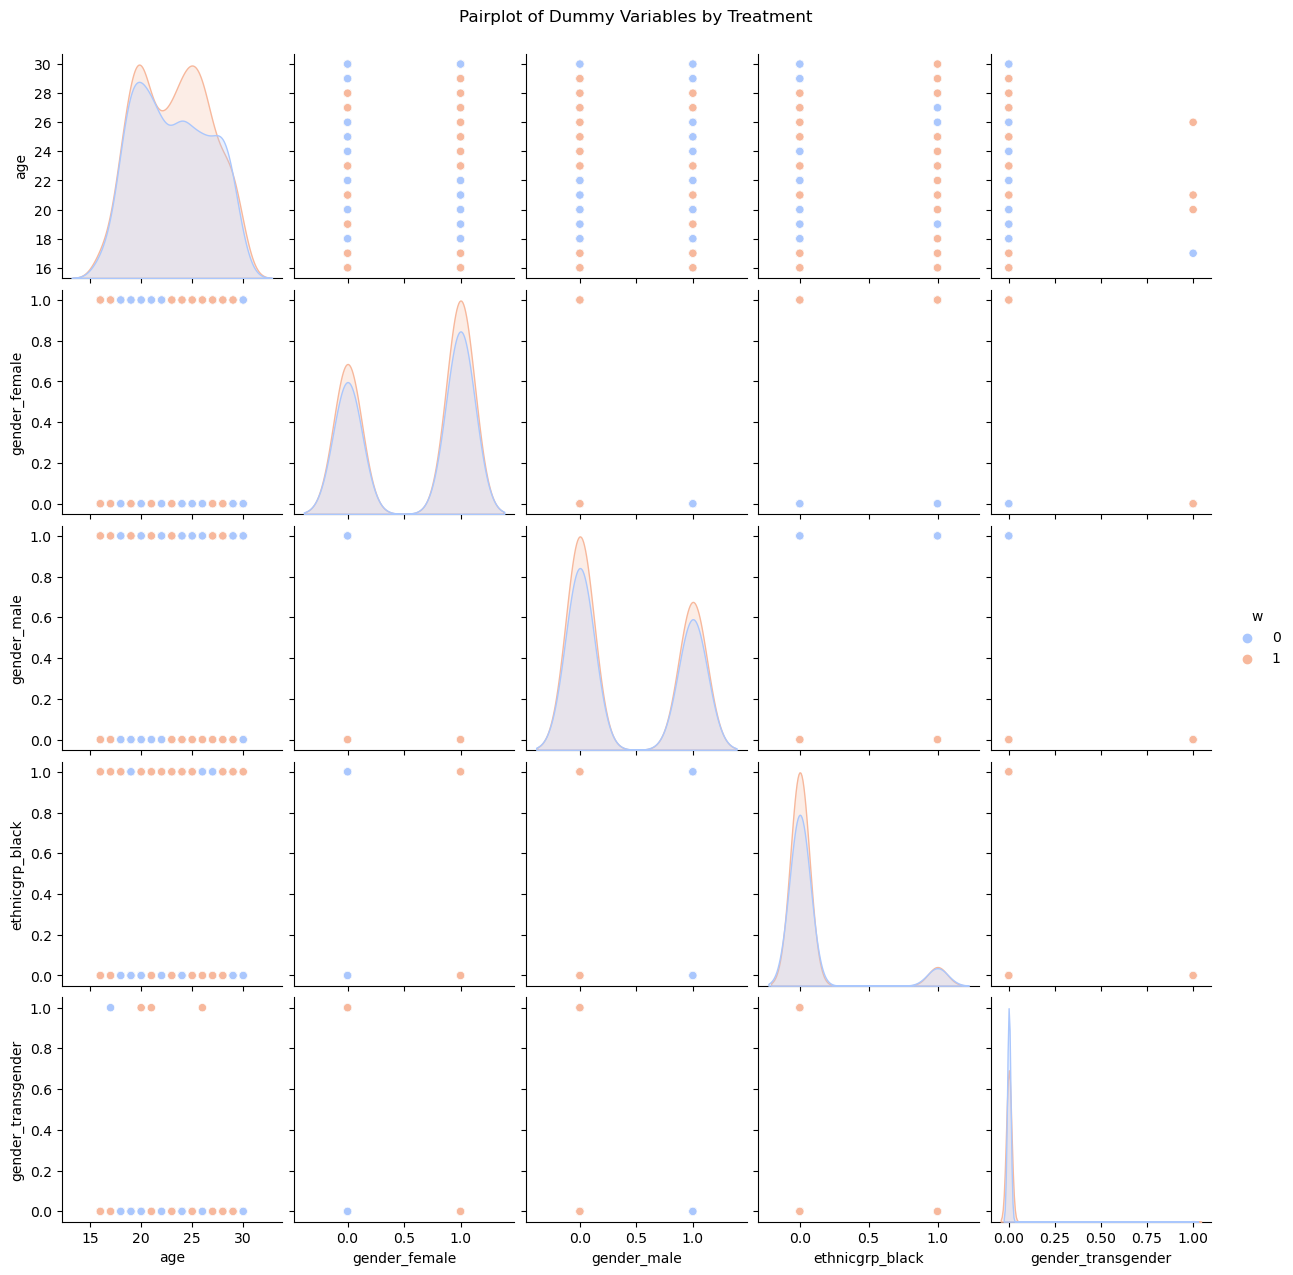

In [ ]:
# Pairplot for dummy variables colored by treatment
sns.pairplot(df, vars=['age','gender_female', 'gender_male', 'ethnicgrp_black','gender_transgender'], hue='w', kind='scatter', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairplot of Dummy Variables by Treatment', y=1.02)
plt.show()

## 2. Linear Regression analysis

Run the next regression Y ~ T . Please show a clear table output and interpret the results.

In [ ]:
# Run the regression Y ~ T
model = smf.ols('y ~ w', data=df).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     144.5
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           4.96e-32
Time:                        20:45:38   Log-Likelihood:                -1112.9
No. Observations:                1739   AIC:                             2230.
Df Residuals:                    1737   BIC:                             2241.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2115      0.016     13.174      0.0

Interpretation: There is a significant (p<0.05) and positive effect of the treatment on the outcome. The probability that Y is equal to 1 increases by 26.52 percentage points when w=1, compared to w=0. However, there is omitted variable bias because only outocme was regressed with treatment.

Run the regression Y ~ T + X (any variables of your preference). Please show a clear table output and interpret the results.

In [ ]:
# Define the formula for the regression
formula = 'y ~ w + age + gender_female + gender_male + ethnicgrp_black + gender_transgender + msm'

# Run the regression Y ~ T+ X (any variables of your preference)
model = smf.ols(formula, data=df).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     32.50
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           2.96e-37
Time:                        20:45:38   Log-Likelihood:                -1089.6
No. Observations:                1739   AIC:                             2193.
Df Residuals:                    1732   BIC:                             2231.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0343      0

Interpretation: There is a significant (p<0.05) and positive effect of the treatment on the outcome. The probability that Y is equal to 1 increases by 26.11 percentage points when w=1, compared to w=0. Likewise, the other variables that were significant are age and male with a significance level of 0.05.

Use the Double Lasso Method to estimate Y ~ T + X. Please show a clear table output and interpret the results.

In [ ]:
# Define the treatment, outcome, and covariates
T = df['w']
Y = df['y']
X = df[['age','gender_female', 'gender_male','ethnicgrp_black','gender_transgender', 'msm']]

lasso = LassoCV(cv=5, random_state=0).fit(X, T)
selected_covariates = X.columns[lasso.coef_ != 0]
lasso_Y = WeightedLasso(alpha=lasso.alpha_).fit(X[selected_covariates], Y, sample_weight=T)

# Print the coefficients
coefficients = pd.DataFrame({'Feature': selected_covariates, 'Coefficient': lasso_Y.coef_})
print(coefficients)

# Calculate the treatment effect
treatment_effect = lasso_Y.coef_[0]
print(f'Treatment Effect: {treatment_effect}')

  Feature  Coefficient
0     age     0.021871
Treatment Effect: 0.021871246877642546


Show All the coefficients from T in a figure and compare. You should have three coefficients from the three coefficients above.

In [ ]:
model_ols_no_X = smf.ols('y ~ w', data=df).fit()
coef_ols_no_X = model_ols_no_X.params['w']

model_ols_with_X = smf.ols('y ~ w + age + gender_female + gender_male + ethnicgrp_black + gender_transgender + msm', data=df).fit()
coef_ols_with_X = model_ols_with_X.params['w']

lasso = LassoCV(cv=5, random_state=0).fit(X, T)
selected_covariates = X.columns[lasso.coef_ != 0]
lasso_Y = WeightedLasso(alpha=lasso.alpha_).fit(X[selected_covariates], Y, sample_weight=T)
coef_double_lasso = lasso_Y.coef_[0]

In [ ]:
coef_df = pd.DataFrame({
    'Method': ['OLS without X', 'OLS with X', 'Double Lasso'],
    'Treatment Coefficient': [coef_ols_no_X, coef_ols_with_X, coef_double_lasso]
})

print(coef_df)

          Method  Treatment Coefficient
0  OLS without X               0.265164
1     OLS with X               0.261294
2   Double Lasso               0.021871


In [20]:
!pip install multiprocess
!pip install pyreadr
!git clone https://github.com/maxhuppertz/hdmpy.git

Cloning into 'hdmpy'...


In [22]:
import sys
sys.path.insert(1, "./hdmpy")
import hdmpy

# 3.Non-Linear Methods DML

In [12]:
data = pd.read_csv("https://github.com/gsbDBI/ExperimentData/raw/97a11199ba559f01c7b3803a1493ffa08631732e/eSTI/processed_data/processed_esti.csv")
data['intercept'] = 1

In [14]:
# some summary statistics
print("The length of y is: ", y.shape[0])
print("The number of features in x is: ", x.shape[1])
all_columns = "+".join(data.iloc[:,2:].columns)
all_columns

The length of y is:  1739
The number of features in x is:  13


'gender_female+gender_male+gender_transgender+ethnicgrp_asian+ethnicgrp_black+ethnicgrp_mixed_multiple+ethnicgrp_other+ethnicgrp_white+partners1+postlaunch+msm+age+imd_decile+intercept'

In [15]:
def dml(X, D, y, modely, modeld, *, nfolds, classifier=False, time = None, clu = None, cluster = True):

    cv = KFold(n_splits=nfolds, shuffle=True, random_state=123) # shuffled k-folds
    yhat = cross_val_predict(modely, X, y, cv=cv, n_jobs=-1) # out-of-fold predictions for y
    # out-of-fold predictions for D
    # use predict or predict_proba dependent on classifier or regressor for D
    if classifier:
        Dhat = cross_val_predict(modeld, X, D, cv=cv, method='predict_proba', n_jobs=-1)[:, 1]
    else:
        Dhat = cross_val_predict(modeld, X, D, cv=cv, n_jobs=-1)
    # calculate outcome and treatment residuals
    resy = y - yhat
    resD = D - Dhat

    if cluster:
      # final stage ols clustered
      dml_data = pd.concat([clu, pd.Series(time), pd.Series(resy, name = 'resy'), pd.Series(resD, name = 'resD')], axis=1)

    else:
      # final stage ols nonclustered
      dml_data = pd.concat([pd.Series(resy, name = 'resy'), pd.Series(resD, name = 'resD')], axis=1)

    if cluster:
      # clustered standard errors
      ols_mod = smf.ols(formula = 'resy ~ 1 + resD', data = dml_data).fit(cov_type='cluster', cov_kwds={"groups": dml_data['CountyCode']})

    else:
      # regular ols
      ols_mod = smf.ols(formula = 'resy ~ 1 + resD', data = dml_data).fit()

    point = ols_mod.params[1]
    stderr = ols_mod.bse[1]
    epsilon = ols_mod.resid

    return point, stderr, yhat, Dhat, resy, resD, epsilon

In [16]:
def summary(point, stderr, yhat, Dhat, resy, resD, epsilon, X, D, y, *, name):
    '''
    Convenience summary function that takes the results of the DML function
    and summarizes several estimation quantities and performance metrics.
    '''
    return pd.DataFrame({'estimate': point, # point estimate
                         'stderr': stderr, # standard error
                         'lower': point - 1.96*stderr, # lower end of 95% confidence interval
                         'upper': point + 1.96*stderr, # upper end of 95% confidence interval
                         'rmse y': np.sqrt(np.mean(resy**2)), # RMSE of model that predicts outcome y
                         'rmse D': np.sqrt(np.mean(resD**2)) # RMSE of model that predicts treatment D
                         }, index=[name])

In [17]:
y = data["y"]
d = data["w"]
x = data[data.columns[~data.columns.isin(['y','w'])]]

# We now run through DML using as first stage models:

- Robust Lasso
- Regression Trees
- Boosting Trees
- Regression Forest

In [37]:
# DML with OLS:
modely = make_pipeline(StandardScaler(), LinearRegression())
modeld = make_pipeline(StandardScaler(), LinearRegression())
result_OLS = dml(x,d,y, modely, modeld, nfolds=10, classifier=False, cluster = False)
table_OLS = summary(*result_OLS, x,d,y, name = 'OLS')
print(table_OLS)

     estimate    stderr     lower    upper    rmse y   rmse D
OLS  0.261983  0.021667  0.219516  0.30445  0.472325  0.50234


In [18]:
class RLasso(BaseEstimator):

    def __init__(self, *, post=True):
        self.post = post

    def fit(self, X, y):
        self.rlasso_ = hdmpy.rlasso(X, y, post=self.post)
        return self

    def predict(self, X):
        return np.array(X) @ np.array(self.rlasso_.est['beta']).flatten() + np.array(self.rlasso_.est['intercept'])

lasso_model = lambda: RLasso(post=False)

## 3.1 DML with RLasso:

In [32]:
modely = make_pipeline(StandardScaler(), RLasso(post=False))
modeld = make_pipeline(StandardScaler(), RLasso(post=False))
result_RLasso = dml(x,d,y, modely, modeld, nfolds=10, classifier=False, cluster = False)
table_RLasso = summary(*result_RLasso, x,d,y, name = 'Lasso')
print(table_RLasso)

       estimate    stderr     lower     upper    rmse y    rmse D
Lasso  0.259067  0.021722  0.216492  0.301642  0.471041  0.500225


## 3.2 DML with Regresion Trees:

In [33]:

modely = make_pipeline(StandardScaler(), DecisionTreeRegressor(ccp_alpha=0.001, min_samples_leaf=5, random_state=123))
modeld = make_pipeline(StandardScaler(), DecisionTreeRegressor(ccp_alpha=0.001, min_samples_leaf=5, random_state=123))
result_RT = dml(x,d,y, modely, modeld, nfolds=10, classifier=False, cluster = False)
table_RT= summary(*result_RT, x,d,y, name = 'RT')
print(table_RT)

    estimate    stderr     lower     upper    rmse y    rmse D
RT  0.249831  0.021872  0.206961  0.292701  0.472259  0.499638


## 3.3 DML with Boosting Trees:

In [34]:
modely = make_pipeline(StandardScaler(), GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=123))
modeld = make_pipeline(StandardScaler(), GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=123))
result_GBT = dml(x,d,y, modely, modeld, nfolds=10, classifier=False, cluster = False)
table_GBT = summary(*result_GBT, x,d,y, name = 'GBT')
print(table_GBT)

     estimate    stderr     lower     upper    rmse y    rmse D
GBT  0.246373  0.021669  0.203902  0.288843  0.475893  0.508383


## 3.4 DML with Regression Forest:

In [35]:
modely = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, min_samples_leaf=5, random_state=123))
modeld = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, min_samples_leaf=5, random_state=123))
result_RF = dml(x,d,y, modely, modeld, nfolds=10, classifier=False, cluster = False)
table_RF = summary(*result_RF, x,d,y, name = 'RF')
print(table_RF)

    estimate    stderr     lower     upper    rmse y    rmse D
RF  0.241558  0.021379  0.199655  0.283461  0.472297  0.511585


## 3.5 Table and plot with all the results:

In [38]:
table = pd.concat([ table_OLS, table_RLasso, table_RT, table_GBT, table_RF], axis=0)

In [39]:
print(table)

       estimate    stderr     lower     upper    rmse y    rmse D
OLS    0.261983  0.021667  0.219516  0.304450  0.472325  0.502340
Lasso  0.259067  0.021722  0.216492  0.301642  0.471041  0.500225
RT     0.249831  0.021872  0.206961  0.292701  0.472259  0.499638
GBT    0.246373  0.021669  0.203902  0.288843  0.475893  0.508383
RF     0.241558  0.021379  0.199655  0.283461  0.472297  0.511585


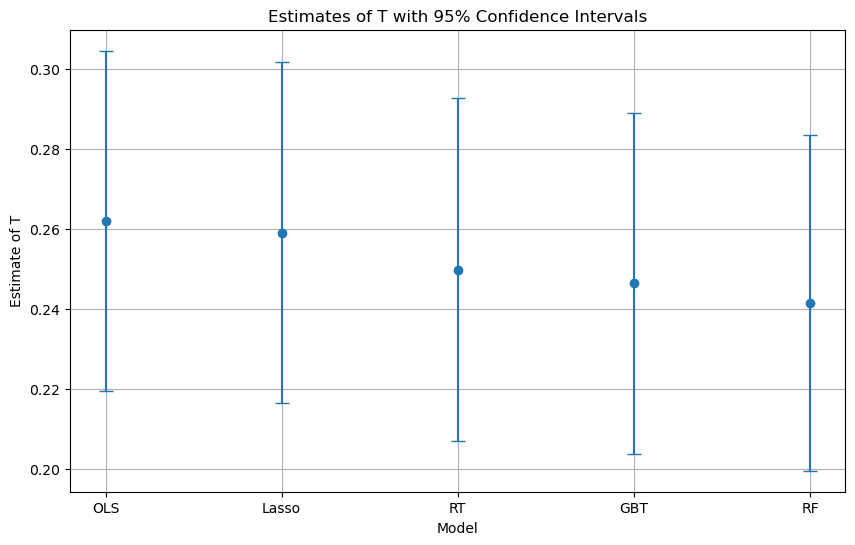

In [43]:
plt.figure(figsize=(10, 6))
plt.errorbar(table.index, table['estimate'], 
             yerr=[table['estimate'] - table['lower'], table['upper'] - table['estimate']], 
             fmt='o', capsize=5)
plt.xlabel('Model')
plt.ylabel('Estimate of T')
plt.title('Estimates of T with 95% Confidence Intervals')
plt.grid(True)
plt.show()

## 3.6 What is the method we will choose?

It seems that the best method for predicting D is the regression tree, and the best method for predicting Y is the robust Lasso because they have the smallest RMSE. Using both models, the result shows that the treated group used some type of STI test 25% more compared to the control group.

In [45]:
modely = make_pipeline(StandardScaler(), RLasso(post=False))
modeld = make_pipeline(StandardScaler(), DecisionTreeRegressor(ccp_alpha=0.001, min_samples_leaf=5, random_state=123))
result_bestmethod = dml(x,d,y, modely, modeld, nfolds=10, classifier=False, cluster = False)
table_bestmethod = summary(*result_bestmethod, x,d,y, name = 'Best method')
print(table_bestmethod)

             estimate    stderr     lower     upper    rmse y    rmse D
Best method  0.255387  0.021775  0.212709  0.298066  0.471041  0.499638
